## **Klasifikasi: Prediksi Terhadap Kesehatan Janin**

Model klasifikasi ini dibuat sebagaimana yang dibutuhkan oleh para profesional di bidang kesehatan ibu & bayi, terutama dokter kandungan. Untuk membantu mereka mengambil keputusan dan tindakan untuk menyelamatkan bayi yang masih dalam kandungan. Output daripada model ini adalah tiga macam: normal, suspect, atau pathological. Model ini dapat digunakan apabila dokter bersangkutan memiliki alat Cardiotocograms (CTGs), sebagai alat pendeteksi detak jantung bayi. 

Dataset pada kasus ini diambil dari kaggle pada [link](https://www.kaggle.com/andrewmvd/fetal-health-classification) berikut ini

Sebelum masuk ke data perlu diketahui pengertian dari setiap variabel, sebagaimana yang telah dijelaskan oleh [Pildner von Steinburg et al, 2013](https://www.researchgate.net/figure/Histogram-of-baseline-fetal-heart-rate-values-A-Training-data-B-Validation-data-C_fig1_237199969), [Healthline](https://www.healthline.com/health/pregnancy/abnormal-fetal-heart-tracings#accelerations), [Choe et al, 2020](https://www.ncbi.nlm.nih.gov/books/NBK557393/), dan [Perinatology](http://perinatology.com/Fetal%20Monitoring/Intrapartum%20Monitoring.htm)

Variabel X:
1.   Baseline Value: Perkiraan detak jantung di antara kontraksi rahim, range normalnya 110-160 bpm
2.   Accelerations: Kenaikan sementara pada detak jantung bayi 
3.   Fetal Movement: Perhitungan pergerakan bayi
4.   Uterine Contractions: Kontraksi pada rahim
5.   Light Decelerations: Penurunan detak jantung sementara yang masih normal
6.   Severe Decelertions: Penurunan detak jantung sementara yang tergolong parah
7.   Prolongued Decelerations: Penurunan detak jantung yang berkepanjangan
8.   Abnormal Short Term Variability: Fluktuasi detak jantung abnormal lebih dari dua siklus per menit (bpm)
9.   Mean Value of Short Term Variability: Rata-rata jangka pendek fluktuasi detak jantung lebih dari dua siklus per menit (bpm)
10.  Percentage of time with Abnormal Long Term Variability: Persentase waktu detak jantung abnormal lebih dari dua siklus per menit
11.  Mean Value of Long Term Variability: Rata-rata jangka panjang fluktuasi detak jantung lebih dari dua siklus per menit (bpm)
12.  Histogram Width: Lebar histogram
13.  Histogram Min: Nilai minimal histogram
14.  Histogram Max: Nilai maksimal histogram
15.  Histogram Number of Peaks: Jumlah puncak histogram
16.  Histogram Number of Zeroes: Jumlah nilai nol dalam histogram
17.  Histogram Mode: Nilai mode histogram
18.  Histogram Mean: Nilai rata-rata histogram
19.	 Histogram Median: Nilai tengah histogram
20.  Histogram Variance: Nilai varians histogram
21.  Histogram Tendency: Nilai kecenderungan histogram
-Catatan: Nilai histogram dihitung berdasarkan data keseluruhan *Fetal Baseline Value Heartrate* yang sudah direkam

Variabel Y:	
22.  Fetal Health (Normal, Suspect, atau Pathological)
	

	
	


	
	



# **Data Discovery**

# **Import Library**
Melakukan import library yang dibutuhkan dalam membangun model prediksi pada klasifikasi kesehatan janin.

In [ ]:
import warnings
warnings.simplefilter(action ="ignore")

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Import the necessary packages
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Algorithms

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## **Loading Data**
Proses membaca data yang sudah disimpan dalam repo, data diambil dari link kaggle yang sudah ditaruh di awal

In [ ]:
# Import Data to Google Colab
data = pd.read_csv('https://raw.githubusercontent.com/ihsanmauri/Telkom-DTI/master/fetal_health.csv', sep = ',')
data

# Show the Data
data.head(15)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.000,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.000,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.000,0.010,0.009,0.0,0.002,26.0,5.9,0.0,0.0,150.0,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.000,0.013,0.008,0.0,0.003,29.0,6.3,0.0,0.0,150.0,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.000,0.000,0.000,0.0,0.000,83.0,0.5,6.0,15.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.000,0.002,0.000,0.0,0.000,84.0,0.5,5.0,13.6,68.0,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.000,0.003,0.000,0.0,0.000,86.0,0.3,6.0,10.6,68.0,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [ ]:
# Analyse statically insight of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [ ]:
data.shape

(2126, 22)

Terlihat data memiliki jumlah sampel sebanyak 2126 dan variabel X sebanyak 21 dan variabel Y sebanyak 1 buah dengan kolom fetal_health

Proses dibawah ini merupakan pencarian data yang hilang atau tidak lengkap

In [ ]:
# Count the missing and null values for dataset fetal healt.
miss_values = data.columns[data.isnull().any()]
print(f"Missing values:\n{data[miss_values].isnull().sum()}")

null_values = data.columns[data.isna().any()]
print(f"Null values:\n{data[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


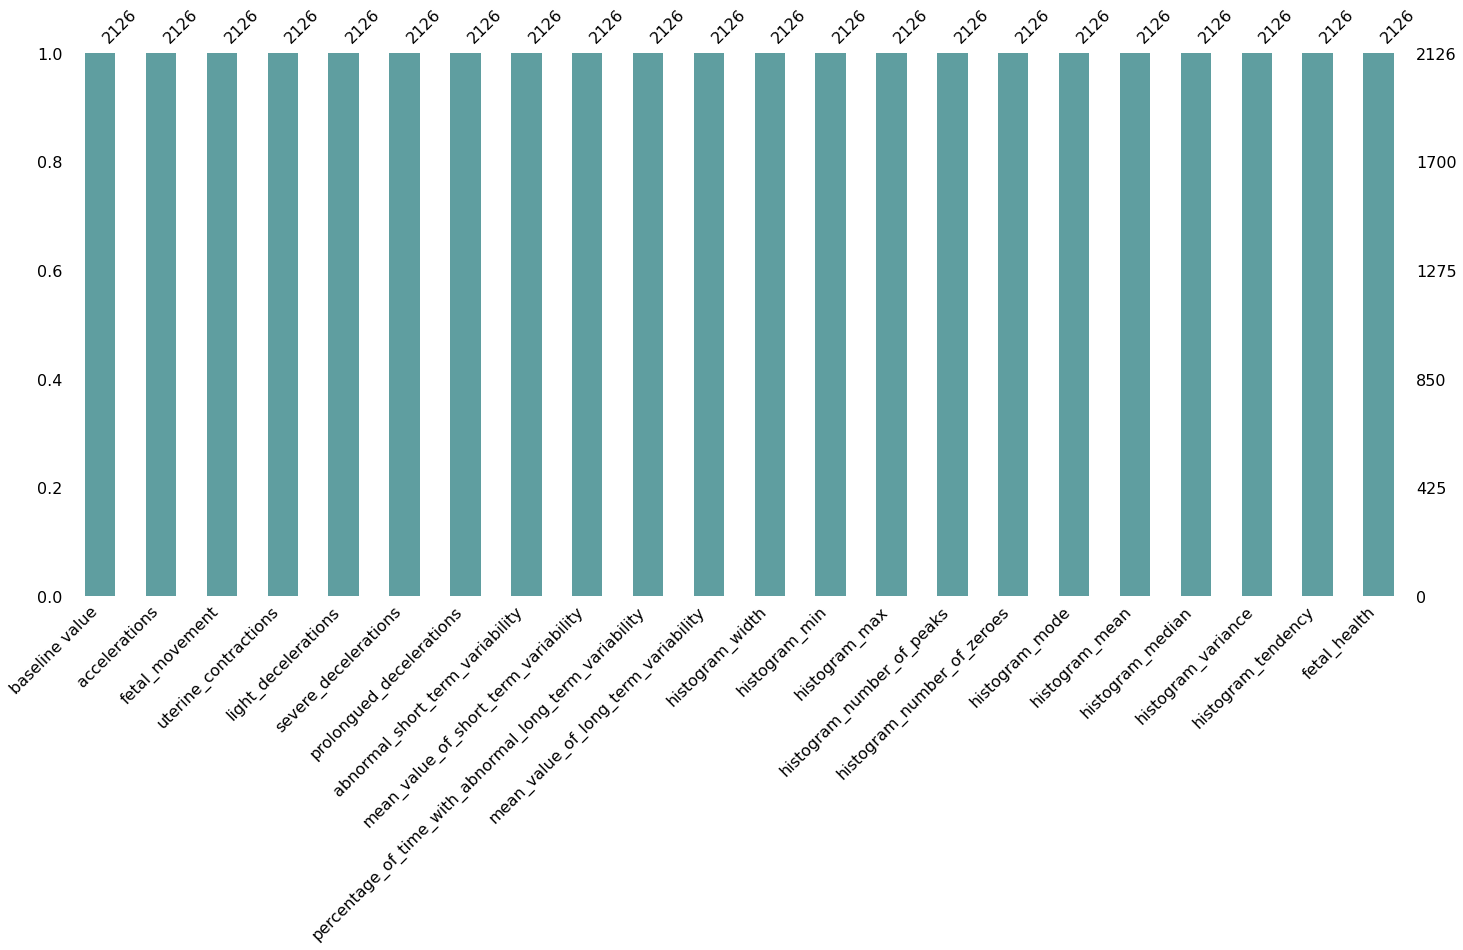

In [ ]:
# Null count analysis
null_plot = msno.bar(data, color = "#5F9EA0")

Pada hasil pencarian di atas dapat dikatakan bahwa data yang bagus, karena tidak ada data yang hilang

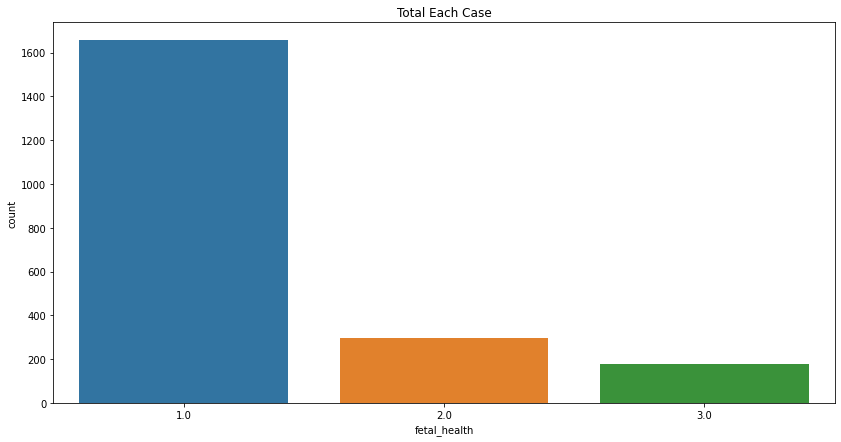

In [ ]:
plt.figure(figsize=(14, 7))
plt.title('Total Each Case')
sns.countplot(x = data['fetal_health'])
plt.show()

Pada grafik di atas, data yang diambil dari kaggle didominasi oleh Normal(1.0), kemudian Suspect (2.0), dan Pathological(3.0)

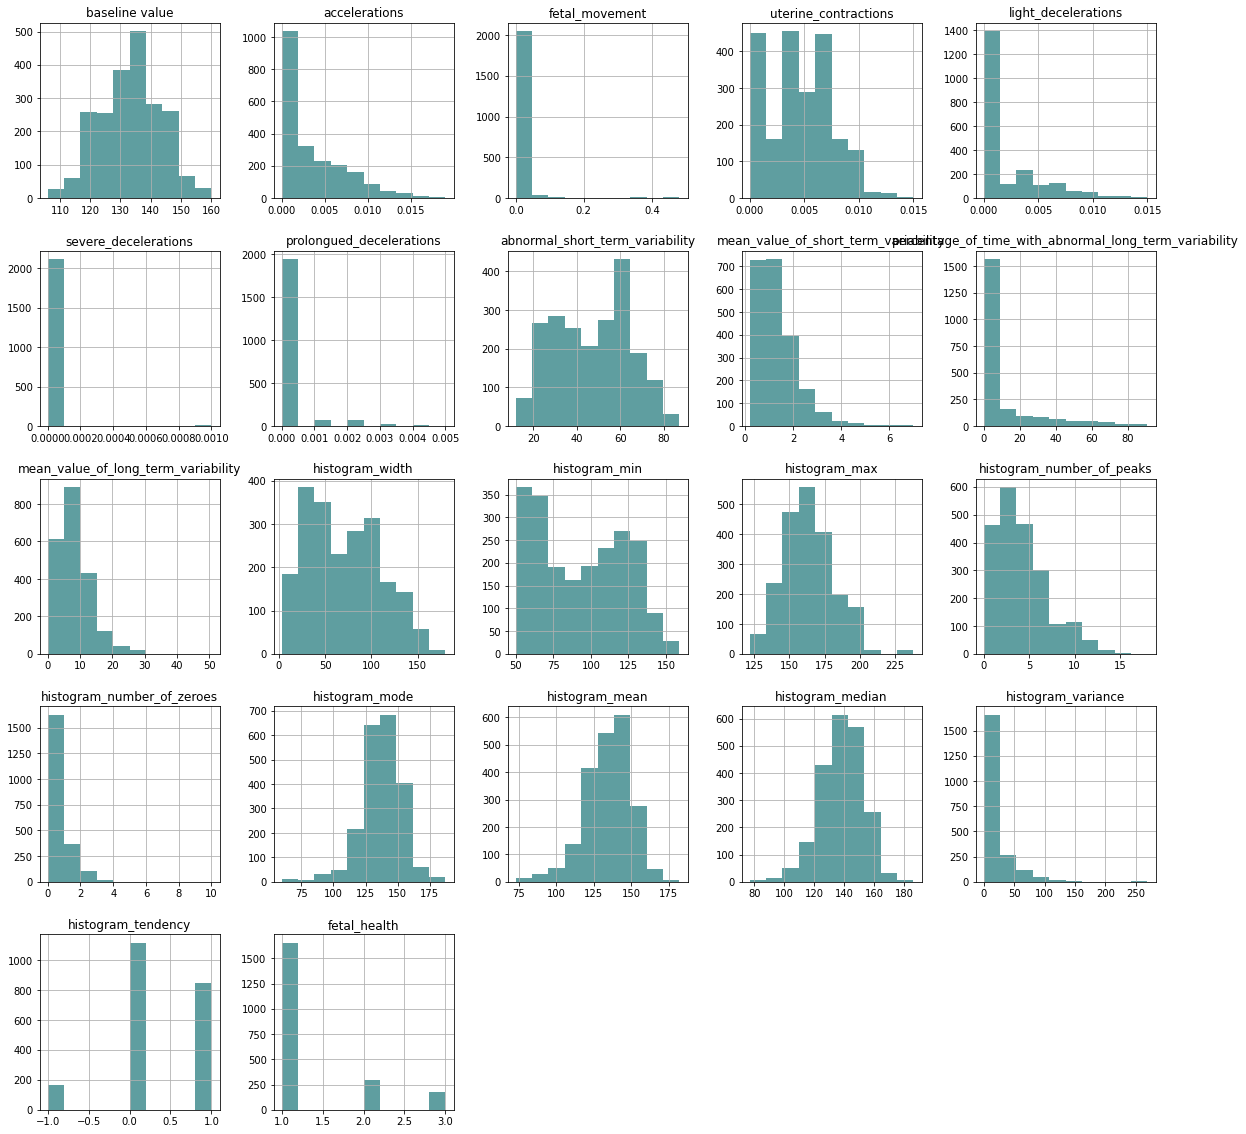

In [ ]:
data_hist_plot = data.hist(figsize = (20,20), color = "#5F9EA0")

Pada histogram di atas dapat dipelajari bahwa data yang mempunyai 3 jenis skewness:


1.   Negatif: Atau nama lain left-skewed distribution. Mempunyai distribusi negatif, karena ada ekor panjang yang mengarah kepada arah negatif pada garis angkanya.  
2.   Positif: Atau nama lain right-skewed distribution. Mempunyai distribusi positif, karena ada ekor panjang yang mengarah kepada arah positif pada garis angkanya. 
3.   Normal: Skewness untuk distribusi normal mempunyai bentuk seperti lonceng


In [ ]:
numeric_data = data.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()
Num_feature = numeric_corr["fetal_health"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = Num_feature.style.background_gradient(cmap=cm)
style

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


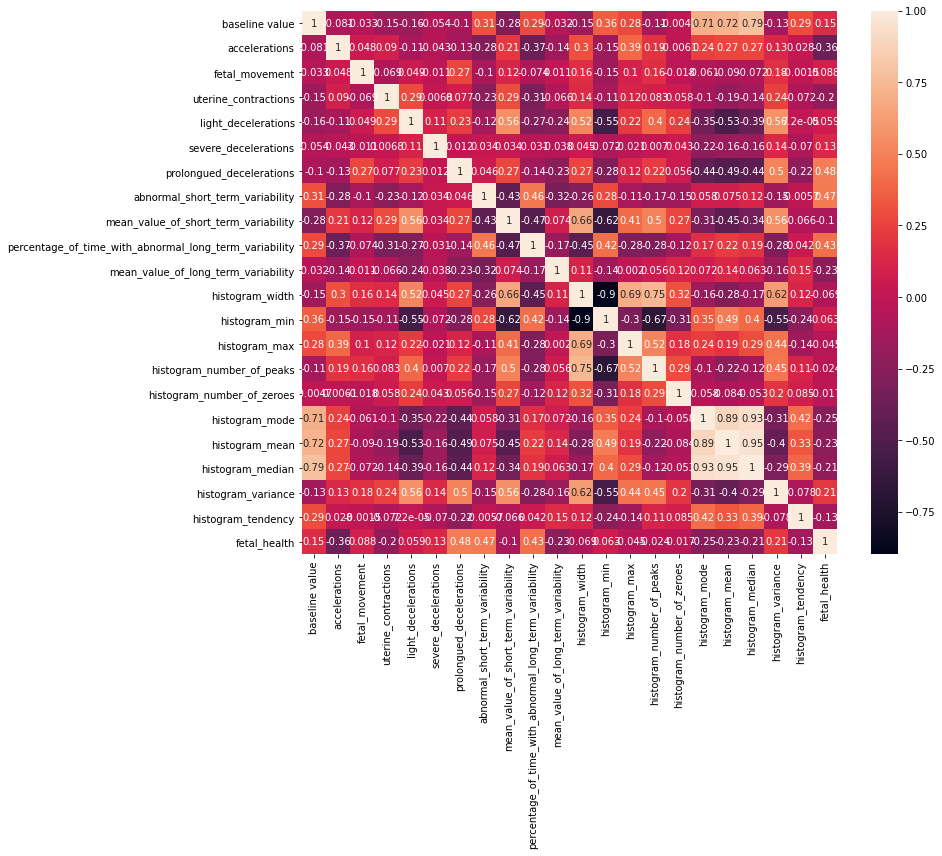

In [ ]:
# Set the size of figure to 12 by 10.
plt.figure(figsize=(12,10))  

# Seaborn has very simple solution for heatmap
p=sns.heatmap(data.corr(), annot=True)

Tabel di atas (seaborn palet warna dan heatmap) menunjukkan seberapa besar nilai hubungan antara variabel fitur dan output. Dapat dilihat bahwa tiga fitur: "prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" mempunyai korelasi yang tinggu dengan variabel output (fetal_health).


# **Normalisasi dan Standarisasi**

Normalisasi merupakan proses mengukur atribut sehingga nilainya berada dalam rentang nilai yang lebih kecil. Sementara standardisasi adalah proses menjadikan variabel-variabel menjadi skala yang sama.

In [ ]:
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(data.drop(["fetal_health"],axis = 1),), columns = columns)

In [ ]:
X.head(15)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.203210,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,-1.028560,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.203210,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,0.393176,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.203210,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,0.926327,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.203210,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.632411,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.203210,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,2.081488,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980
5,0.070757,-0.563635,-0.203210,1.912687,2.402604,-0.057476,3.122175,-1.221153,5.172188,-0.535361,-1.455081,2.042649,-1.474609,2.005277,0.316003,3.791490,-3.752237,-1.771050,-2.149617,5.218765,-0.524526
6,0.070757,-0.563635,-0.203210,2.931233,2.064711,-0.057476,4.817640,-1.046621,5.625172,-0.535361,-1.455081,2.042649,-1.474609,2.005277,0.655137,3.791490,-4.057535,-1.771050,-2.218758,6.772052,-0.524526
7,-1.148938,-0.822388,-0.203210,-1.482465,-0.638438,-0.057476,-0.268754,2.094965,-0.943095,-0.209142,1.317304,-0.062802,-1.068562,-1.896626,-1.379664,-0.458444,-0.943495,-0.808890,-1.043360,-0.545656,1.112980
8,-1.148938,-0.822388,-0.203210,-0.803434,-0.638438,-0.057476,-0.268754,2.153143,-0.943095,-0.263512,0.961870,-0.062802,-1.068562,-1.896626,-1.379664,-0.458444,-0.943495,-0.808890,-1.043360,-0.545656,1.112980
9,-1.148938,-0.822388,-0.203210,-0.463919,-0.638438,-0.057476,-0.268754,2.269498,-1.169587,-0.209142,0.428719,-0.062802,-1.068562,-1.896626,-1.040530,-0.458444,-0.943495,-0.808890,-1.043360,-0.614691,1.112980


In [ ]:
y = data["fetal_health"]

# **Test Train Split** 

Pada tahap ini data dibagi menjadi 80% untuk training dan sisanya 20% untuk data test

In [ ]:
# Importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1700, 21), (426, 21), (1700,), (426,))

# **Modelling**

**K-Nearest Neighbors**

K-nearest neighbors atau KNN adalah algoritma yang berfungsi untuk melakukan klasifikasi suatu data berdasarkan data pembelajaran (train data sets), yang diambil dari k tetangga terdekatnya (nearest neighbors). Dengan k merupakan banyaknya tetangga terdekat. Sehingga pada model ini suatu data akan cenderung mendekati tetangganya yang mempunyai nilai yang sama atau hampir sama, tergantung dari penentuan parameternya. Pada kasus ini kami menggunakan K sebanyak 5.

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30)

#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Predict the response for test dataset
y_pred_knn = knn.predict(X_test)

In [ ]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[321,  10,   1],
       [ 29,  28,   2],
       [  5,   7,  23]])

In [ ]:
# Show the Accuracy, Precision, Recall
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
prec_knn = metrics.precision_score(y_test, y_pred_knn, average='weighted')
rec_knn = metrics.recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = metrics.f1_score(y_test, y_pred_knn, average='weighted')
kappa_knn = metrics.cohen_kappa_score(y_test, y_pred_knn)

print("Accuracy:", acc_knn)
print("Precision:", prec_knn)
print("Recall:", rec_knn)
print("F1 Score:", f1_knn)
print("Cohens Kappa Score:", kappa_knn)

Accuracy: 0.8732394366197183
Precision: 0.8635574330376949
Recall: 0.8732394366197183
F1 Score: 0.864826170190967
Cohens Kappa Score: 0.6169256132287555


**NAIVE BAYES**

Naive Bayes merupakan metode yang menggunakan metode probabilitas. Metode ini termasuk dalam supervised learning. Ciri utama dari model ini adalah asumsi yang bersifat naif. Semua atribut dalam model ini dianggap independen.

In [ ]:
# Import Module
from sklearn.naive_bayes import GaussianNB 

# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict to Test Data
y_pred_gnb= gnb.predict(X_test)

In [ ]:
# Show the Confussion Matrix
cm_gnb = metrics.confusion_matrix(y_test, y_pred_gnb)
cm_gnb

array([[282,  42,   8],
       [  6,  47,   6],
       [  3,  16,  16]])

In [ ]:
# Show the Accuracy, Precision, Recall
acc_gnb = metrics.accuracy_score(y_test, y_pred_gnb)
prec_gnb = metrics.precision_score(y_test, y_pred_gnb, average='weighted')
rec_gnb = metrics.recall_score(y_test, y_pred_gnb, average='weighted')
f1_gnb = metrics.f1_score(y_test, y_pred_gnb, average='weighted')
kappa_gnb = metrics.cohen_kappa_score(y_test, y_pred_gnb)

print("Accuracy:", acc_gnb)
print("Precision:", prec_gnb)
print("Recall:", rec_gnb)
print("F1 Score:",f1_gnb)
print("Cohens Kappa Score:", kappa_gnb)

Accuracy: 0.8098591549295775
Precision: 0.8610519935189603
Recall: 0.8098591549295775
F1 Score: 0.8253672062944524
Cohens Kappa Score: 0.5554438990453368


**RANDOM FOREST**

Model ini merupakan gabungan dari decision tree, yang kemudian digabung menjadi satu model yang dinamakan Random Forest. Random Forest bergantung pada sebuah nilai vector random dengan distribusi yang sama pada semua pohon yang masing masing decision tree memiliki kedalaman yang maksimal.

In [ ]:
# Import Module
from sklearn.ensemble import RandomForestClassifier

# Modeling Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Predict to Test Data
y_pred_rfc= rfc.predict(X_test)

In [ ]:
cm_rfc = metrics.confusion_matrix(y_test, y_pred_rfc)
cm_rfc

array([[324,   7,   1],
       [ 15,  41,   3],
       [  2,   4,  29]])

In [ ]:
# Show the Accuracy, Precision, Recall
acc_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
prec_rfc = metrics.precision_score(y_test, y_pred_rfc, average='weighted')
rec_rfc = metrics.recall_score(y_test, y_pred_rfc, average='weighted')
f1_rfc = metrics.f1_score(y_test, y_pred_rfc, average='weighted')
kappa_rfc = metrics.cohen_kappa_score(y_test, y_pred_rfc)

print("Accuracy:", acc_rfc)
print("Precision:", prec_rfc)
print("Recall:", rec_rfc)
print("F1 Score:",f1_rfc)
print("Cohens Kappa Score:", kappa_rfc)

Accuracy: 0.9248826291079812
Precision: 0.9218908142692785
Recall: 0.9248826291079812
F1 Score: 0.9227833068624957
Cohens Kappa Score: 0.7871363657656814


**DECISION TREE**

Model ini merupakan diagram alir yang mempunyai bentuk seperti pohon. Pohon ini mempunyai akar node yang berfungsi mengumpulkan data. Sebuah inner node yang berada pada root node yang berisi tentang pertanyaan tentang data dan  sebuah leaf node yang digunakan untuk memecahkan masalah serta membuat keputusan. Decision tree tergolong sebagai algoritma unsupervised learning, karena modelnya ditentukan oleh mesin sendiri. 

In [ ]:
# Import Module
from sklearn import tree

# Modeling Decision Tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtc.fit(X_train, y_train)

# Predict to Test Data 
y_pred_dtc = dtc.predict(X_test)

In [ ]:
# Import Module
from sklearn import metrics

# Show the Confussion Matrix
cm_dtc = metrics.confusion_matrix(y_test, y_pred_dtc)
cm_dtc

array([[324,   3,   5],
       [ 26,  31,   2],
       [  2,   1,  32]])

In [ ]:
# Show the Accuracy, Precision, Recall
acc_dtc = metrics.accuracy_score(y_test, y_pred_dtc)
prec_dtc = metrics.precision_score(y_test, y_pred_dtc, average='weighted')
rec_dtc = metrics.recall_score(y_test, y_pred_dtc, average='weighted')
f1_dtc = metrics.f1_score(y_test, y_pred_dtc, average='weighted')
kappa_dtc = metrics.cohen_kappa_score(y_test, y_pred_dtc)
 
print("Accuracy:", acc_dtc)
print("Precision:", prec_dtc)
print("Recall:", rec_dtc)
print("F1 Score:",f1_dtc)
print("Cohens Kappa Score:", kappa_dtc)

Accuracy: 0.9084507042253521
Precision: 0.9074319264460109
Recall: 0.9084507042253521
F1 Score: 0.900731172950153
Cohens Kappa Score: 0.7284495439835246


Secara performa model Random Forest merupakan yang terbaik. Karena dilihat dari hasil evaluasinya, model tersebut memiliki angka Accuracy, Precision, Recall, F1, dan Kappa yang lebih besar dibandingkan yang lainnya.

# **RFC Confusion Matrix**

Matrix di bawah ini menggambarkan bagaimana data yang sudah dilatih dapat dilihat performa hasilnya atau prediksi. Pada grafik ini digunakan model Random Forest, sehingga nilai yang muncul merupakan hasil perhitungan dari RF.

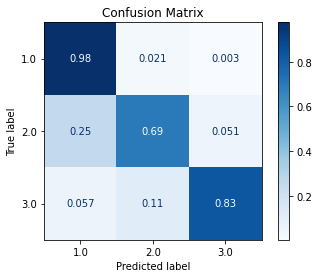

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
# Predict the test set
predictions = rfc.predict(X_test)

# Generate confusion matrix
matrix = plot_confusion_matrix(rfc, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

Pada tabel di atas dapat dilihat (T: True Label dan P:Predicted Label) bahwa: 


1.   1T dan 1P merupakan: True Positive
2.   1T dan 2P merupakan: False Negative
3.   1T dan 3P merupakan: False Negative
4.   2T dan 1P merupakan: False Positive
5.   2T dan 2P merupakan: True Negative
6.   2T dan 3P merupakan: True Negative
7.   3T dan 1P merupakan: False Positive
8.   3T dan 2P merupakan: True Negative
9.   3T dan 3P merupakan: True Negative



# **Output**

In [ ]:
# Create Datafame Contains Fature and Result of prediction
data_compare = X_test.copy()
data_compare['ActualClass'] = y_test
data_compare['kNN'] = y_pred_knn
data_compare['Naive Bayes'] = y_pred_gnb
data_compare['Random Forest'] = y_pred_rfc
data_compare['Decision Tree'] = y_pred_dtc


In [ ]:
data_compare.head(20)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,ActualClass,kNN,Naive Bayes,Random Forest,Decision Tree
1354,-0.132526,0.471379,-0.203210,-0.803434,0.375243,-0.057476,-0.268754,-1.279331,0.189365,-0.535361,0.499806,0.553428,-0.594841,0.221550,-0.023130,2.374846,0.216638,0.217414,0.132038,-0.096928,1.112980,1.0,1.0,1.0,1.0,1.0
1028,0.172398,2.023900,-0.203210,0.215111,0.037349,-0.057476,-0.268754,-1.279331,1.321824,-0.535361,-0.637583,0.476399,-0.154957,0.778965,0.316003,2.374846,0.338757,0.666422,0.616025,-0.304033,-0.524526,1.0,1.0,1.0,1.0,1.0
637,0.985528,0.988886,0.182602,-1.482465,-0.638438,-0.057476,-0.268754,-0.173958,-0.037127,-0.535361,0.570893,0.784514,-0.459492,0.946189,0.655137,-0.458444,0.521936,0.794709,0.685166,-0.476621,-0.524526,1.0,1.0,1.0,1.0,1.0
918,-1.148938,-0.822388,-0.203210,-0.463919,0.037349,-0.057476,-0.268754,-0.639378,-0.376865,0.117077,-0.086660,-0.730384,-0.222632,-1.952368,-0.701397,-0.458444,-0.882435,-1.129610,-1.181642,-0.304033,1.112980,1.0,1.0,1.0,1.0,1.0
1208,0.274039,-0.046128,-0.203210,0.554627,-0.638438,-0.057476,-0.268754,0.058752,-0.716603,-0.426622,0.215459,-0.730384,0.927834,-0.057157,-1.040530,0.958201,0.399817,0.602278,0.477743,-0.580173,-0.524526,1.0,1.0,1.0,1.0,1.0
1199,0.985528,0.471379,-0.203210,0.215111,-0.638438,-0.057476,-0.268754,-0.173958,-0.263619,-0.263512,0.713067,-0.653355,1.164694,0.500257,-0.023130,-0.458444,0.582996,0.858853,0.754307,-0.511138,-0.524526,1.0,1.0,1.0,1.0,1.0
508,2.408505,1.506393,-0.117474,-1.142949,-0.638438,-0.057476,-0.268754,0.058752,-0.716603,-0.535361,-0.513181,-0.807412,2.010625,1.559346,-1.040530,-0.458444,1.559950,2.077589,1.929705,-0.442103,-2.162031,1.0,1.0,1.0,1.0,1.0
204,-1.352220,-0.822388,-0.031738,-1.482465,-0.638438,-0.057476,-0.268754,0.233285,-0.716603,0.280186,-0.139975,-1.269584,0.521787,-1.896626,-1.040530,0.958201,-0.882435,-0.873034,-1.043360,-0.649208,-0.524526,1.0,1.0,1.0,1.0,1.0
1636,-0.335808,0.212626,-0.074606,0.215111,0.037349,-0.057476,-0.268754,0.233285,1.661562,-0.535361,-0.708670,0.142608,-0.222632,-0.057157,0.316003,-0.458444,-0.149720,-0.231594,-0.144526,-0.269516,-0.524526,1.0,1.0,1.0,1.0,1.0
1504,-0.335808,0.730133,-0.203210,0.554627,-0.638438,-0.057476,-0.268754,-0.523023,-0.376865,-0.535361,-0.015573,-0.447945,0.284927,-0.503089,0.655137,0.958201,-0.088660,0.024982,-0.075385,-0.511138,-0.524526,1.0,1.0,1.0,1.0,1.0


# **Cross Validation**

**1. GridSearchCV**

GridSearch merupakan proses penentuan hyper parameter dari sebuah model yang sudah ditentukan. Proses ini sangat signifikan karena performansi seluruh model berdasrakan nilai hyper parameter yang ditentukan.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameters
grid_param = {
    'max_depth' :[10,20,30],
    'max_features':['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [4,5,6],
    'n_estimators': [50, 100, 200, 400]
}

# Create a base model
rf_grids = RandomForestClassifier()

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=grid_param, scoring='f1_weighted',
                           cv=5, n_jobs=-1, verbose=6)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 309 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  3.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# Results from Grid Search
print(" Results from Grid Search " )
print()
print("\n The best estimator across ALL searched params:\n",
          grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n",
          grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n",
          grid_search.best_params_)

 Results from Grid Search 


 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.9413957477295163

 The best parameters across ALL searched params:
 {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Predict to Test Data 
y_pred_grid_search = grid_search.predict(X_test)

In [ ]:
# Show the Accuracy, Precision, Recall
acc_gs = metrics.accuracy_score(y_test, y_pred_grid_search)
prec_gs = metrics.precision_score(y_test, y_pred_grid_search, average='weighted')
rec_gs = metrics.recall_score(y_test, y_pred_grid_search, average='weighted')
f1_gs = metrics.f1_score(y_test, y_pred_grid_search, average='weighted')
kappa_gs = metrics.cohen_kappa_score(y_test, y_pred_grid_search)
 
print("Accuracy:", acc_gs)
print("Precision:", prec_gs)
print("Recall:", rec_gs)
print("F1 Score:",f1_gs)
print("Cohens Kappa Score:", kappa_gs)

Accuracy: 0.9295774647887324
Precision: 0.9272205383149689
Recall: 0.9295774647887324
F1 Score: 0.9264215965710039
Cohens Kappa Score: 0.7961722488038278


**2. RandomizedSearchCV**

Mengdefinisikan sebuah ruang pencarian sebagai domain dari nilai hyper parameter dan mensampling secara random poin sample di domain tersebut

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Create the random grid
random_grid = {'bootstrap': [True, False],
               'max_depth': [10,20,30],
              'max_features': ['auto'],
              'min_samples_leaf': [1,2,3],
              'min_samples_split': [4,5,6],
              'n_estimators': [50, 100, 200, 400]}


# Create a base model
rf_grids = RandomForestClassifier()

# Initiate the grid search model
rgrid_search = GridSearchCV(estimator=rf_grids, param_grid=random_grid, scoring='f1_weighted',
                           cv=5, n_jobs=-1, verbose=6)

# Fit the grid search to the data
rgrid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 309 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 609 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  7.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# Results from Grid Search
print(" Results from Grid Search " )
print()
print("\n The best estimator across ALL searched params:\n",
          rgrid_search.best_estimator_)
print("\n The best score across ALL searched params:\n",
          rgrid_search.best_score_)
print("\n The best parameters across ALL searched params:\n",
          rgrid_search.best_params_)

 Results from Grid Search 


 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.9478242788118626

 The best parameters across ALL searched params:
 {'bootstrap': False, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 50}


In [ ]:
# Predict to Test Data 
y_pred_rgrid_search = rgrid_search.predict(X_test)

In [ ]:
# Show the Accuracy, Precision, Recall Of RandomizedSearchCV
acc_gs = metrics.accuracy_score(y_test, y_pred_rgrid_search)
prec_gs = metrics.precision_score(y_test, y_pred_rgrid_search, average='weighted')
rec_gs = metrics.recall_score(y_test, y_pred_rgrid_search, average='weighted')
f1_gs = metrics.f1_score(y_test, y_pred_rgrid_search, average='weighted')
kappa_gs = metrics.cohen_kappa_score(y_test, y_pred_rgrid_search)
 
print("Accuracy:", acc_gs)
print("Precision:", prec_gs)
print("Recall:", rec_gs)
print("F1 Score:",f1_gs)
print("Cohens Kappa Score:", kappa_gs)

Accuracy: 0.9366197183098591
Precision: 0.9344840122030198
Recall: 0.9366197183098591
F1 Score: 0.934620765427386
Cohens Kappa Score: 0.8196952595936795


# **User Input**

In [ ]:
import joblib
 
# Saving model
def predict_advanced(baselinevalue, accelerations, fetal_movement,
       uterine_contractions, light_decelerations, severe_decelerations,
       prolongued_decelerations, abnormal_short_term_variability,
       mean_value_of_short_term_variability,
       percentage_of_time_with_abnormal_long_term_variability,
       mean_value_of_long_term_variability, histogram_width,
       histogram_min, histogram_max, histogram_number_of_peaks,
       histogram_number_of_zeroes, histogram_mode, histogram_mean,
       histogram_median, histogram_variance, histogram_tendency):
    model = joblib.load('Fetal Health Prediciton.joblib') 
 
    predict_data = pd.DataFrame([[baselinevalue, accelerations, fetal_movement,
       uterine_contractions, light_decelerations, severe_decelerations,
       prolongued_decelerations, abnormal_short_term_variability,
       mean_value_of_short_term_variability,
       percentage_of_time_with_abnormal_long_term_variability,
       mean_value_of_long_term_variability, histogram_width,
       histogram_min, histogram_max, histogram_number_of_peaks,
       histogram_number_of_zeroes, histogram_mode, histogram_mean,
       histogram_median, histogram_variance, histogram_tendency]], columns=[['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']])
 
    pred = model.predict(predict_data)[0]

In [ ]:
import pickle
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(rgrid_search) 
  
# Load the pickled model 
rgrid_search_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
rgrid_search_from_pickle.predict(X_test) 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 2., 1., 1., 1.,
       1., 1., 1., 1., 3., 3., 1., 1., 1., 1., 1., 1., 2., 1., 1., 3., 1.,
       1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 2., 1., 1., 1., 1., 2., 2., 1., 1., 3., 1., 1., 1., 1., 1., 1.,
       2., 2., 1., 1., 1., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 3., 3., 3., 2., 3., 1., 1., 3., 1., 1., 1.,
       1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1.,
       2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 2., 1., 1., 1.,
       1., 1., 1., 1., 1., 3., 2., 1., 3., 2., 2., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       1., 2., 1., 1., 1.

In [ ]:
from sklearn.externals import joblib

joblib.dump(rfc, 'Fetal Health.joblib')

def feature_FH(baselinevalue, accelerations, fetal_movement,
       uterine_contractions, light_decelerations, severe_decelerations,
       prolongued_decelerations, abnormal_short_term_variability,
       mean_value_of_short_term_variability,
       percentage_of_time_with_abnormal_long_term_variability,
       mean_value_of_long_term_variability, histogram_width,
       histogram_min, histogram_max, histogram_number_of_peaks,
       histogram_number_of_zeroes, histogram_mode, histogram_mean,
       histogram_median, histogram_variance, histogram_tendency):
    
    rgrid_search_from_joblib = joblib.load('Fetal Health.joblib')
    
    predict_data = pd.DataFrame([[baselinevalue, accelerations, fetal_movement,
       uterine_contractions, light_decelerations, severe_decelerations,
       prolongued_decelerations, abnormal_short_term_variability,
       mean_value_of_short_term_variability,
       percentage_of_time_with_abnormal_long_term_variability,
       mean_value_of_long_term_variability, histogram_width,
       histogram_min, histogram_max, histogram_number_of_peaks,
       histogram_number_of_zeroes, histogram_mode, histogram_mean,
       histogram_median, histogram_variance, histogram_tendency]],
       
       columns=[['baselinevalue', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']]
                                )
    pred = rgrid_search_from_joblib.predict(predict_data)[0]

    return pred

## **Function Input User**

Pada bagian ini, user memberikan inputan berupa value yang dibutuhkan untuk setiap atribut secara manual tergantung dari kondisi bayi yang sedang diperiksa.

In [ ]:
def input_user():
  a = input("Masukkan Nilai baselinevalue = ")
  b = input("Masukkan Nilai accelerations = ")
  c = input("Masukkan Nilai fetal_movement = ")
  d = input("Masukkan Nilai uterine_contractions = ")
  e = input("Masukkan Nilai light_decelerations = ")
  f = input("Masukkan Nilai severe_decelerations = ")
  g = input("Masukkan Nilai prolongued_decelerations = ")
  h = input("Masukkan Nilai abnormal_short_term_variability = ")
  i = input("Masukkan Nilai mean_value_of_short_term_variability = ")
  j = input("Masukkan Nilai percentage_of_time_with_abnormal_long_term_variability = ")
  k = input("Masukkan Nilai mean_value_of_long_term_variability = ")
  l = input("Masukkan Nilai histogram_width = ")
  m = input("Masukkan Nilai histogram_min = ")
  n = input("Masukkan Nilai histogram_max = ")
  o = input("Masukkan Nilai histogram_number_of_peaks = ")
  p = input("Masukkan Nilai histogram_number_of_zeroes = ")
  q = input("Masukkan Nilai histogram_mode = ")
  r = input("Masukkan Nilai histogram_mean = ")
  s = input("Masukkan Nilai histogram_median = ")
  t = input("Masukkan Nilai histogram_variance = ")
  u = input("Masukkan Nilai histogram_tendency = ")
  v = input("Masukkan Nilai fetal_health = ")

  nilai = []
  z = [a]+[b]+[c]+[d]+[e]+[f]+[g]+[h]+[i]+[j]+[k]+[l]+[m]+[n]+[o]+[p]+[q]+[r]+[s]+[t]+[u]+[v]
  nilai.append(z)

  newdata = pd.DataFrame(nilai, columns=data.columns)
  columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

  X_new =  scale_X.transform(newdata.drop(["fetal_health"],axis = 1))[0]
  return X_new


## **Function Prediction**

In [ ]:
def prediksi(X_new):
  pred = feature_FH(X_new[0], X_new[1], X_new[2], X_new[3], X_new[4], X_new[5], X_new[6], X_new[7], X_new[8], X_new[9], X_new[10],
                    X_new[11], X_new[12], X_new[13],X_new[14], X_new[15], X_new[16], X_new[17], X_new[18], X_new[19], X_new[20])
  if pred == 1.0: 
    return ('Kesehatan Janin anda Normal')
  elif pred == 2.0: 
    return ('Kesehatan Janin anda Suspect')
  elif pred ==3.0:
    return ('Kesehatan Janin anda Pathological')
  else: 
    return (pred,'Tidak ada hasil')

## **Build the Main Menu**

In [ ]:
from os import system, name 

def main_menu():
  print("\tProgram Prediksi Kesehatan Janin\n\t  1. Prediksi Kesehatan Janin\n\t  0. Exit")
  a = input("Masukan Pilihan : ")
  a = int(a) 
  if a == 1 :
    while a != 0 :
        datauser = input_user()
        system('cls')
        print("\n")
        print("Hasil Prediksi Kesehatan Bayi = ", prediksi(datauser))
        print("\n\t  1. untuk kembali ke menu awal")
        print("\t 0. untuk exit")
        a = input("Masukan Pilihan : ")
        a = int(a) 
        if a == 1 :
          main_menu()
        elif a == 0 :
          print("Terima kasih telah menggunakan program ini")
          a == 0
  else :
     print("Terima kasih telah menggunakan program ini")


## **Running the Main Menu**

In [ ]:
main_menu()

	Program Prediksi Kesehatan Janin
	  1. Prediksi Kesehatan Janin
	  0. Exit
Masukan Pilihan : 0
Terima kasih telah menggunakan program ini
